In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [57]:
data = pd.read_csv("data/2019_processed.csv")

In [58]:
data.describe()

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,5.407096,-1.821904e-16,-1.366428e-16,-3.188333e-16,-2.732857e-16,2.135044e-16,-9.109522e-17
std,1.113120,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.853000,-2.272016e+00,-4.040270e+00,-2.995340e+00,-2.739702e+00,-1.940552e+00,-1.169929e+00
25%,4.544500,-7.590498e-01,-5.115926e-01,-7.330690e-01,-5.902074e-01,-7.988725e-01,-6.727736e-01
50%,5.379500,1.376858e-01,2.095177e-01,2.633213e-01,1.704905e-01,-7.712138e-02,-2.655293e-01
75%,6.184500,8.216898e-01,8.144816e-01,6.463895e-01,8.003344e-01,6.656261e-01,3.241817e-01
max,7.769000,1.955003e+00,1.387693e+00,1.717122e+00,1.663971e+00,4.001429e+00,3.621803e+00


In [59]:
data_features = data.drop("country", axis=1)

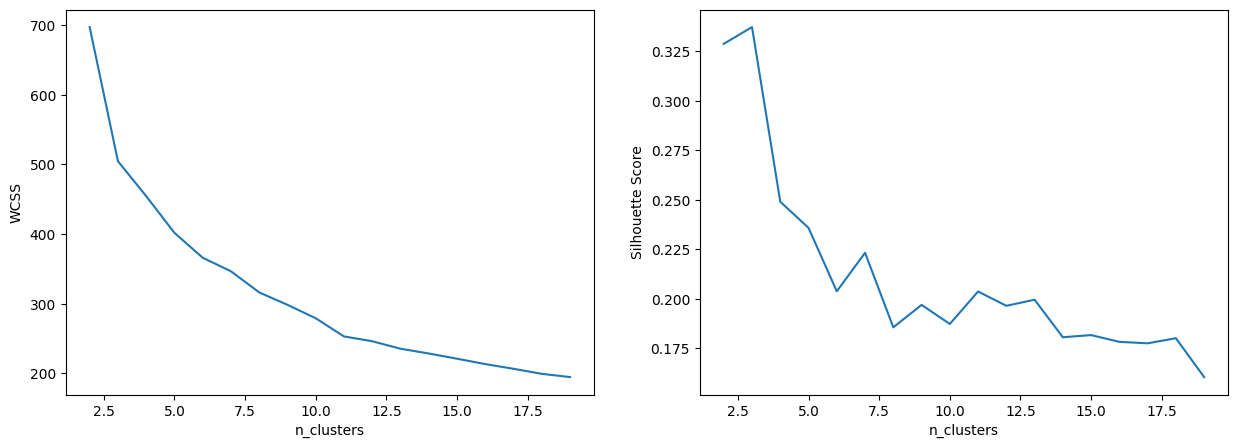

In [60]:
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, random_state=100)
    kmeans.fit(data_features)
    
    wcss.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(data_features, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

    
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')


plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [61]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=3000, random_state=100)
kmeans.fit(data_features)

KMeans(max_iter=3000, n_clusters=7, random_state=100)

In [62]:
centroids = kmeans.cluster_centers_
centroids

array([[ 4.58673913, -0.46037439, -0.55013851, -0.95398524, -0.46580133,
        -0.68578866, -0.33290512],
       [ 5.39436   ,  0.39010209,  0.43779967,  0.44455077, -1.05109267,
        -0.7021841 , -0.60846077],
       [ 7.0236087 ,  1.2298004 ,  0.95624052,  1.09544974,  1.08381343,
         0.94508362,  1.80426544],
       [ 4.52081818, -0.86133662, -0.59932907, -0.60756979,  0.46899618,
         0.9960808 ,  0.13883022],
       [ 6.04968889,  0.459593  ,  0.54720567,  0.54903351,  0.54781523,
        -0.37072099, -0.35026902],
       [ 3.083     , -2.20675373, -4.04027021, -2.56167746, -1.16945448,
         0.52652502, -0.79970695],
       [ 3.93135294, -1.58675741, -1.6284755 , -1.36151458, -1.27865342,
         0.34311532, -0.30130706]])

In [ ]:
centroids_df = pd.DataFrame(centroids, columns=data_features.columns)
centroids_df.to_csv("data/centroids_2019.csv", index=False)

In [ ]:
clusters = data["country"]
membership = pd.Series(kmeans.labels_, name="membership")
clusters = pd.concat([clusters, membership], axis=1)

clusters

In [65]:
clusters["membership"].value_counts()

membership
4    45
1    25
2    23
0    23
3    22
6    17
5     1
Name: count, dtype: int64

In [66]:
clusters.to_csv("data/clusters_2019.csv", index=False)